In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
%matplotlib inline

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer, Activation, Input
from keras.models import Sequential
from keras import optimizers

np.random.seed(42)

In [2]:
# Create arrays with filenames and lables
inFile = open("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/train-of.txt", "r")

all_images = []
all_labels = []
for i, v in enumerate(inFile):
    all_images.append(str(i)+".jpg")
    all_labels.append(float(v))

In [3]:
train_images, val_images, test_images = all_images[: 14280], all_images[14280 : 18360], all_images[18360 :]
train_labels, val_labels, test_labels = all_labels[: 14280], all_labels[14280 : 18360], all_labels[18360 :]

In [4]:
import random

rand_train = list(zip(train_images, train_labels))
random.shuffle(rand_train)
train_images, train_labels = zip(*rand_train)

rand_val = list(zip(val_images, val_labels))
random.shuffle(rand_val)
val_images, val_labels = zip(*rand_val)

test_rand = list(zip(test_images, test_labels))
random.shuffle(test_rand)
test_images, test_labels = zip(*test_rand)

In [5]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
IMG_DIM = (150, 150)

train_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-of/"+img, target_size=IMG_DIM)) for img in train_images]
train_images_array = np.array(train_images_array)

val_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-of/"+img, target_size=IMG_DIM)) for img in val_images]
val_images_array = np.array(val_images_array)

test_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-of/"+img, target_size=IMG_DIM)) for img in test_images]
test_images_array = np.array(test_images_array)

print('Train dataset shape:', train_images_array.shape, '\tValidation dataset shape:', val_images_array.shape, '\tTest dataset shape:', test_images_array.shape)


Train dataset shape: (14280, 150, 150, 3) 	Validation dataset shape: (4080, 150, 150, 3) 	Test dataset shape: (2038, 150, 150, 3)


(150, 150, 3)


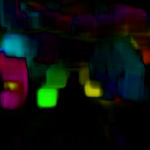

In [7]:
train_imgs_scaled = train_images_array.astype('float32')
val_imgs_scaled  = val_images_array.astype('float32')
test_imgs_scaled  = test_images_array.astype('float32')
train_imgs_scaled /= 255
val_imgs_scaled /= 255
test_imgs_scaled /= 255

print(train_images_array[0].shape)
array_to_img(train_images_array[0])

In [8]:
batch_size = 24
epochs = 15
input_shape = (150, 150, 3)

In [9]:
model = Sequential()

model.add(Conv2D(32, (8, 8), (4,4), 'same'))
model.add(Activation('relu'))

model.add(Conv2D(64, (8, 8), (4,4), 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (4, 4), (2,2), 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (2, 2), (1,1), 'same'))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(128))

model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mean_squared_error')

In [10]:
history = model.fit(x=train_imgs_scaled, y=train_labels,
                    validation_data=(val_imgs_scaled, val_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/15
595/595 [==============================] - 137s 227ms/step - loss: 102.6268 - val_loss: 59.5564
Epoch 2/15
595/595 [==============================] - 122s 206ms/step - loss: 25.4663 - val_loss: 48.0901
Epoch 3/15
595/595 [==============================] - 117s 197ms/step - loss: 20.6535 - val_loss: 55.1599
Epoch 4/15
595/595 [==============================] - 126s 213ms/step - loss: 17.3013 - val_loss: 61.3274
Epoch 5/15
595/595 [==============================] - 90s 151ms/step - loss: 14.4211 - val_loss: 57.1692
Epoch 6/15
595/595 [==============================] - 83s 140ms/step - loss: 13.5665 - val_loss: 52.3915
Epoch 7/15
595/595 [==============================] - 84s 141ms/step - loss: 12.5998 - val_loss: 55.0782
Epoch 8/15
595/595 [==============================] - 83s 139ms/step - loss: 11.4100 - val_loss: 60.5927
Epoch 9/15
595/595 [==============================] - 84s 140ms/step - loss: 10.7839 - val_loss: 46.9731
Epoch 10/15
595/595 [=============================

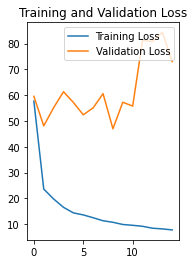

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
results = model.evaluate(test_imgs_scaled, test_labels, batch_size=batch_size)


85/85 [==============================] - 7s 79ms/step - loss: 42.6274
